## 決定木

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# データ準備
df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# 決定木モデル(回帰)
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [4]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.1060246260428703

In [5]:
# R^2
model.score(X_test, y_test) # R-squared

0.3590618660303134

### 決定木の可視化

In [8]:
y_train.loc[X_train[X_train['total_bill']>20.49].index].mean()

3.948

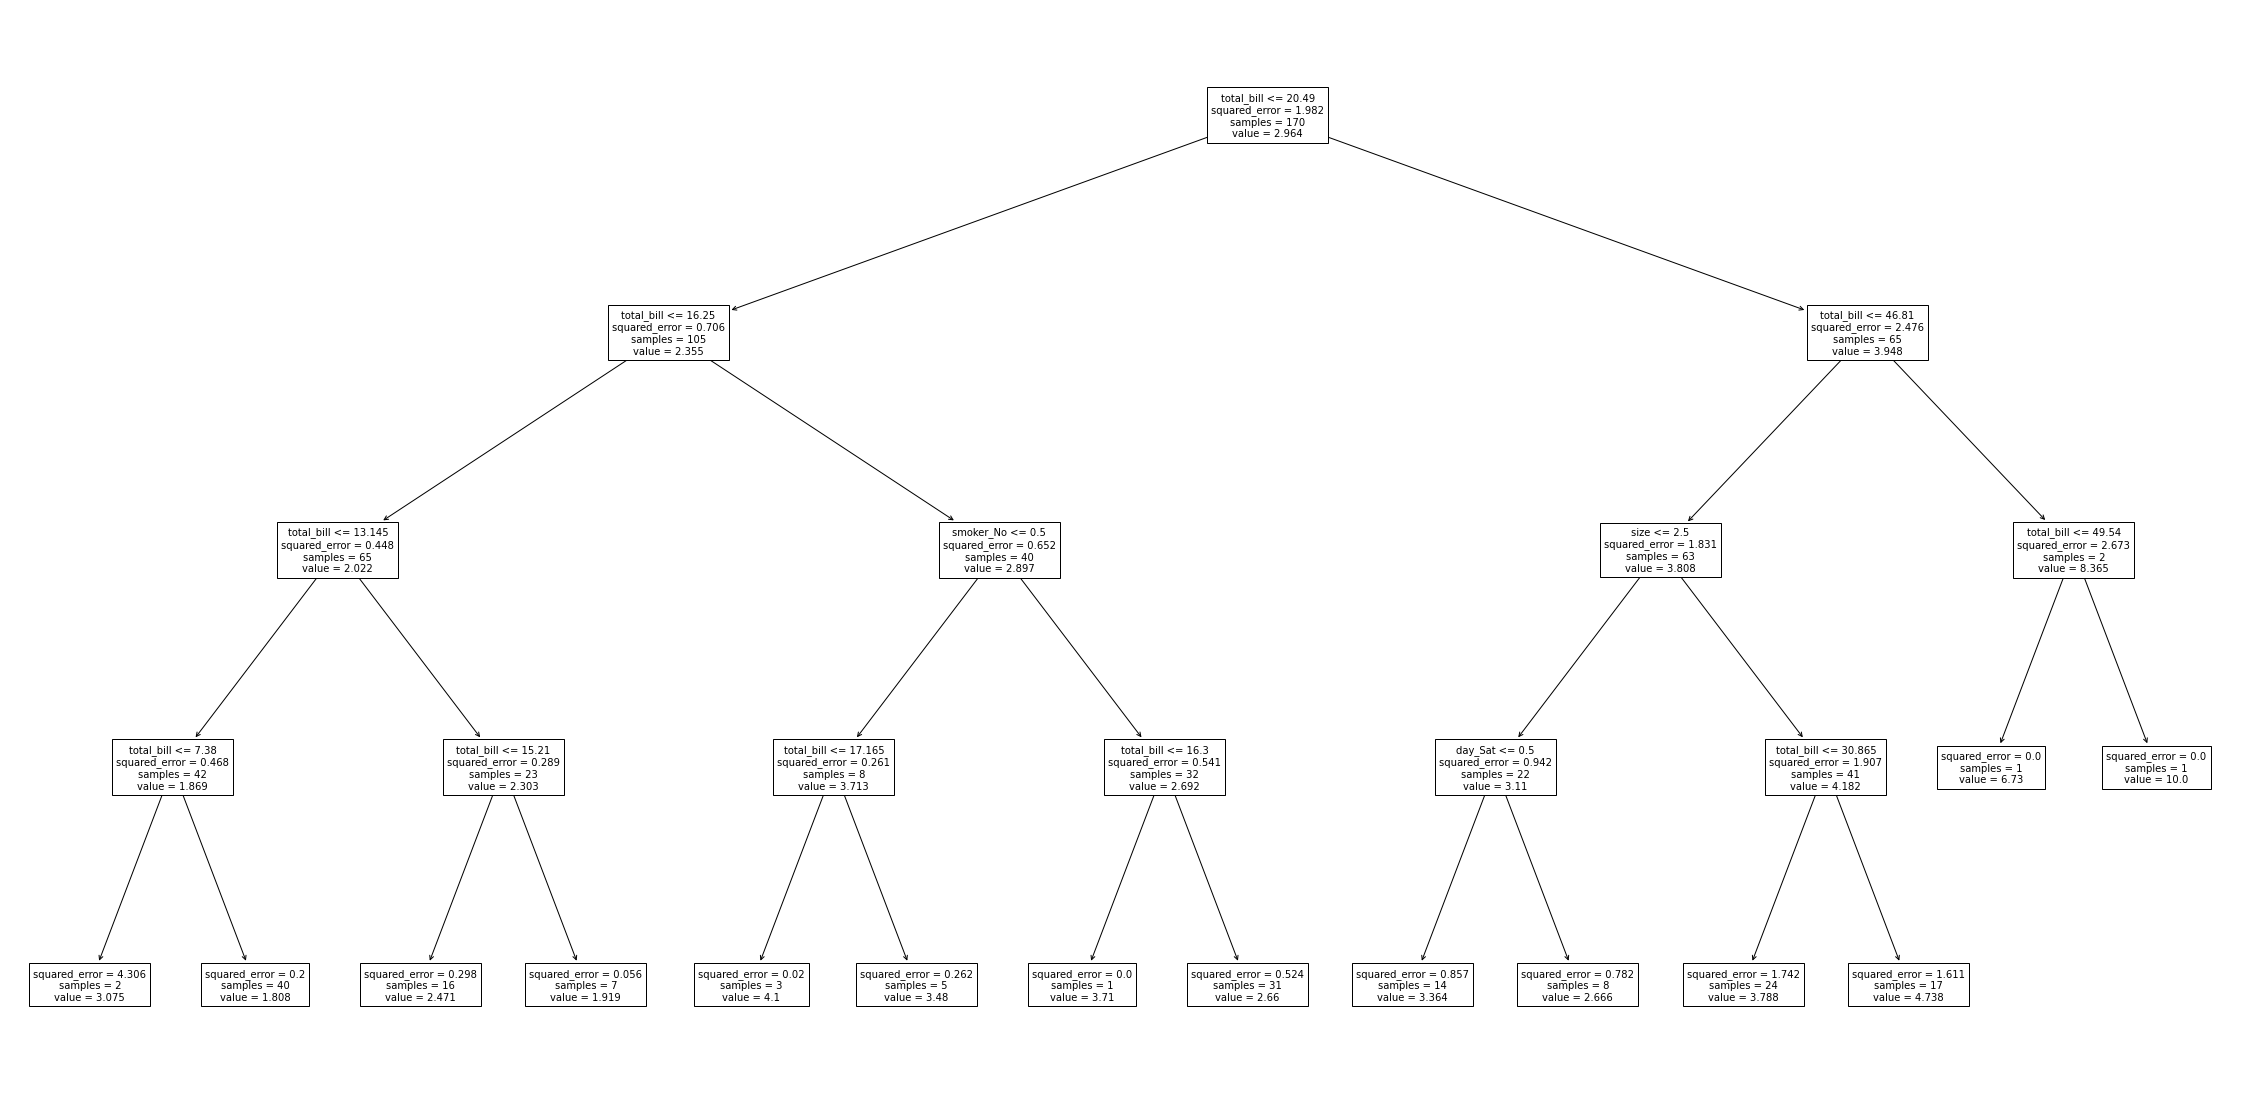

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

In [7]:
print(tree.export_text(model, feature_names=list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

### 決定木の特徴量の重要度

In [10]:
# 各特徴量の重要度
model.feature_importances_

array([0.87823592, 0.07825569, 0.        , 0.03169922, 0.        ,
       0.01180916, 0.        , 0.        ])

<BarContainer object of 8 artists>

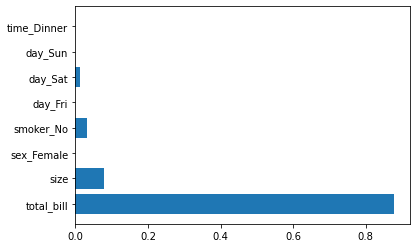

In [11]:
plt.barh(model.feature_names_in_, model.feature_importances_)

### Minimal Cost Complexity Pruning

In [21]:
model = tree.DecisionTreeRegressor(random_state=0)
# 決定木を剪定する閾値となるαと不純度のリスト
path = model.cost_complexity_pruning_path(X_train, y_train)
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [22]:
eff_alphas = path.ccp_alphas

In [23]:
# 各αでのモデルを構築
models = []
for a in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=a)
    model.fit(X_train, y_train)
    models.append(model)

In [24]:
# それぞれのモデルの精度指標を記録(上記のfor文の中で実行した方が効率がいいが，ここでは別ループにて実行する)
from sklearn.metrics import mean_squared_error
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

Text(0, 0.5, 'MSE')

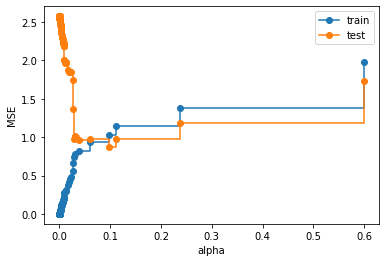

In [26]:
# 各αで剪定したときのモデルの精度の推移を描画
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')